In [5]:
import pandas as pd
import numpy as np
from tslearn import barycenters
import matplotlib.pyplot as plt

# Euclidean Barycenter Averaging

In [21]:
test_df = pd.read_csv("../data/clustering/jan_mondays.csv")

In [23]:
test_df.columns.tolist()[0] == 'Unnamed: 0'

True

In [9]:
test_df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
test_df.set_index('modified_index', inplace=True)
test_df.head()

,JMON-1:P_TOTAL_SJN,JMON-2:P_TOTAL_SJN,JMON-3:P_TOTAL_SJN,JMON-4:P_TOTAL_SJN
modified_index,,,,
00:00:00,13575.423,12882.394,12732.352,13160.015
00:15:00,13191.545,12714.635,12577.430,12933.261
00:30:00,13064.414,12476.851,12417.855,12733.229
00:45:00,12836.590,12314.395,12304.554,12434.646
01:00:00,12532.873,12120.047,12158.334,12285.742


<AxesSubplot: xlabel='modified_index'>

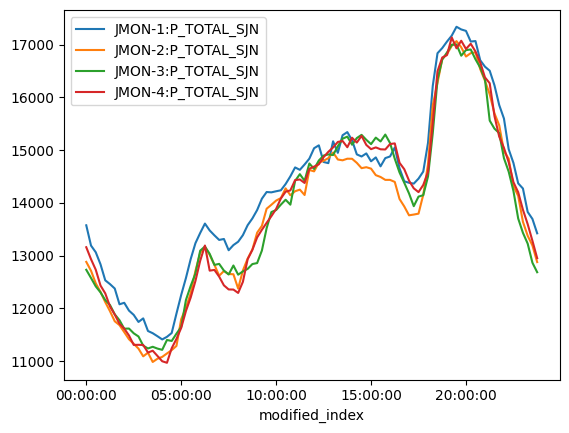

In [8]:
test_df.plot()

In [4]:
time_series = [[1, 2, 3, 4], [1, 2, 4, 5]] #each list is a column in my data
bar = barycenters.euclidean_barycenter(time_series)
bar.shape

(4, 1)

In [22]:
time_series[1]

[1, 2, 4, 5]

In [5]:
tstmp = np.array(time_series).T
dt_idx = pd.date_range(start="2/02/2016 8:00",freq="15 min",periods=4)


,X1,X2
2016-02-02 08:00:00,1,1
2016-02-02 08:15:00,2,2
2016-02-02 08:30:00,3,4
2016-02-02 08:45:00,4,5


In [2]:
test_df = pd.read_csv("../data/clustering/jan_mondays.csv")
test_df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
test_df.set_index('modified_index', inplace=True)
test_data_tranposed = test_df.to_numpy().T
test_data_ebc = barycenters.euclidean_barycenter(test_data_tranposed)
test_data_ebc_transposed = test_data_ebc.transpose()
test_data_with_ebc = np.append(test_data_tranposed,test_data_ebc_transposed, axis=0)
test_data_cols_mod = test_df.columns.to_list()
test_data_cols_mod.append('Euclidean Barycenter')
test_data_ebc_df = pd.DataFrame(test_data_with_ebc.T,columns=test_data_cols_mod)
test_data_ebc_df.set_index(test_df.index,inplace=True)

In [13]:
test_data_ebc_df.columns.to_list()[:-1]

['JMON-1:P_TOTAL_SJN',
 'JMON-2:P_TOTAL_SJN',
 'JMON-3:P_TOTAL_SJN',
 'JMON-4:P_TOTAL_SJN']

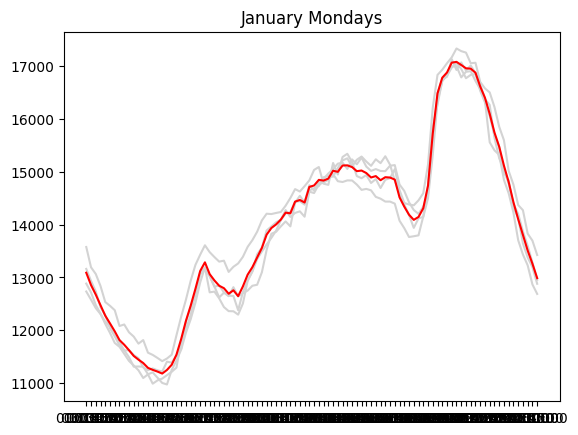

In [6]:
# Create a list of the columns to plot
columns = ['JMON-1:P_TOTAL_SJN', 'JMON-2:P_TOTAL_SJN', 'JMON-3:P_TOTAL_SJN', 'JMON-4:P_TOTAL_SJN']

# Set the color of the lines to light grey
color = 'lightgrey'

# Plot the lines
for column in columns:
    plt.plot(test_data_ebc_df[column], color=color)

plt.plot(test_data_ebc_df['Euclidean Barycenter'],color='red')

# Set the title of the plot
plt.title('January Mondays')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


""" 
dtfmt_test_data_ebc_df = test_data_ebc_df.copy()
dtfmt_test_data_ebc_df.set_index(pd.to_datetime(test_data_ebc_df.index),inplace=True)

# Create a list of the columns to plot
columns = ['JMON-1:P_TOTAL_SJN', 'JMON-2:P_TOTAL_SJN', 'JMON-3:P_TOTAL_SJN', 'JMON-4:P_TOTAL_SJN']

# Set the color of the lines to light grey
color = 'lightgrey'

# Plot the lines
for column in columns:
    plt.plot(dtfmt_test_data_ebc_df[column], color=color)

ax = dtfmt_test_data_ebc_df.plot(['Euclidean Barycenter'],color='red')

df = dtfmt_test_data_ebc_df
tick_positions = range(len(df.index))
tick_labels = df.index.strftime('%H:%M')

# Set the tick positions and labels for the x-axis
plt.xticks(tick_positions, tick_labels)

# Set the title of the plot
plt.title('January Mondays')

# Show the plot
plt.show() 
"""




# Create a dataframe with a datetime index
df = pd.DataFrame({"value": [1, 2, 3, 4]})
df.index = pd.date_range("2023-05-19 00:00:00", freq='15 min',periods=4)


#TODO Fix plotting issue. Neeed to format x-axis in hours and minuts
#create the major formatter

#create the minor formatter

#set the major formatter

#set the minor formatter


# Plot the dataframe
ax = df.plot()
fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(fmt)

plt.show()


In [24]:
#TODO Write a function to take a dataframe(index-agnostic) and calculate the Euclidean Barycentric Average for all the variables in the df.

def get_ebc_from_df(df):
    ''''
    This assumes df has a column of the index which was auto set to 'Unnamed 0' as is the case
    when the user imports without explicitly specifying the date time column
    '''
    if df.columns.tolist()[0] == 'Unnamed: 0':
        df.rename(columns={'Unnamed: 0':'modified_index'}, inplace=True)
        df.set_index('modified_index', inplace=True)
    data_tranposed = df.to_numpy().T
    data_ebc = barycenters.euclidean_barycenter(data_tranposed)
    data_ebc_transposed = data_ebc.transpose()
    data_with_ebc = np.append(data_tranposed,data_ebc_transposed, axis=0)
    data_cols_mod = df.columns.to_list()
    data_cols_mod.append('Euclidean Barycenter')
    data_ebc_df = pd.DataFrame(data_with_ebc.T,columns=data_cols_mod)
    data_ebc_df.set_index(df.index,inplace=True)
    return data_ebc_df

In [14]:
def plot_highlighted_ebc(ebc_df,title):
    '''
    Highlights the euclidean barycenter in read compred to the rest of the variables(in grey)
    '''
    import matplotlib.pyplot as plt
    # Create a list of the columns to plot
    columns = ebc_df.columns.to_list()[:-1]

    # Set the color of the lines to light grey
    color = 'lightgrey'

    # Plot the lines
    for column in columns:
        plt.plot(ebc_df[column], color=color)

    plt.plot(ebc_df['Euclidean Barycenter'],color='red')

    # Set the title of the plot
    plt.title(title)

    # Show the plot
    plt.show()


<AxesSubplot: xlabel='modified_index'>

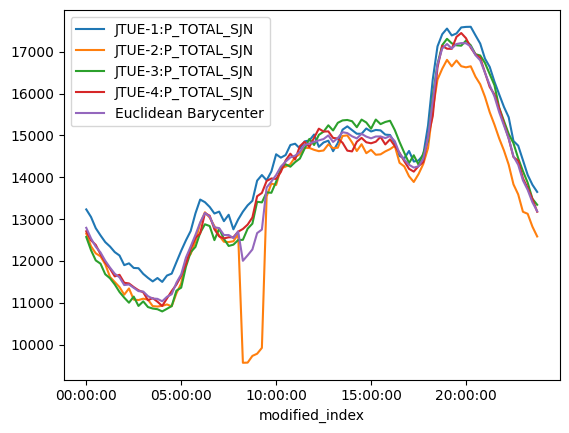

In [15]:
# testing get_ebc_from_df()
jan_wk2_bc_df=  pd.read_csv("../data/clustering/jan_tuesdays.csv")
jan_wk2_bc = get_ebc_from_df(jan_wk2_bc_df)
jan_wk2_bc.plot()


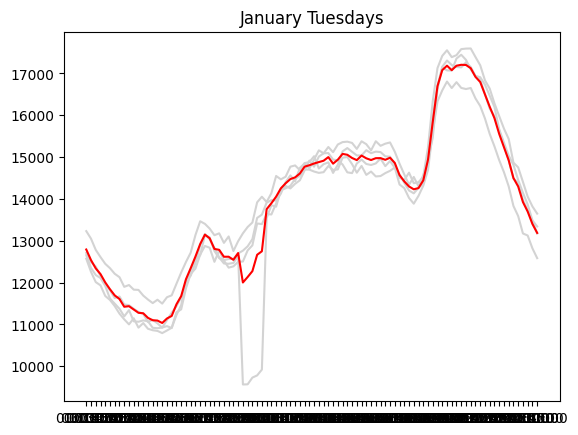

In [16]:
#testing plot_highlighted_ebc
plot_highlighted_ebc(jan_wk2_bc,'January Tuesdays')

In [27]:
#averaging January weekdays
jan_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_mondays.csv"))
jan_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_tuesdays.csv"))
jan_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_wednesdays.csv"))
jan_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_thursdays.csv"))
jan_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_fridays.csv"))
jan_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_saturdays.csv"))
jan_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_sundays.csv"))


#averaging February weekdays
feb_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_mondays.csv"))
feb_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_tuesdays.csv"))
feb_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_wednesdays.csv"))
feb_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_thursdays.csv"))
feb_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_fridays.csv"))
feb_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/feb_saturdays.csv"))
feb_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_sundays.csv"))


#averaging all weekdays in January and february
jan_and_feb_mondays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_mondays.csv"))
jan_and_feb_tuesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_tuesdays.csv"))
jan_and_feb_wednesdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_wednesdays.csv"))
jan_and_feb_thursdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_thursdays.csv"))
jan_and_feb_fridays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_fridays.csv"))
jan_and_feb_saturdays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_saturdays.csv"))
jan_and_feb_sundays_ebcs = get_ebc_from_df(pd.read_csv("../data/clustering/jan_and_feb_sundays.csv"))

#averaging weeks 1-4 in January
jan_wk1 = pd.read_csv('../data/clustering/jan_wk1.csv')
jan_wk2 = pd.read_csv('../data/clustering/jan_wk2.csv')
jan_wk3 = pd.read_csv('../data/clustering/jan_wk3.csv')
jan_wk4 = pd.read_csv('../data/clustering/jan_wk4.csv')

jan_wk1_ebcs = get_ebc_from_df(jan_wk1)
jan_wk2_ebcs = get_ebc_from_df(jan_wk2)
jan_wk3_ebcs = get_ebc_from_df(jan_wk3)
jan_wk4_ebcs = get_ebc_from_df(jan_wk4)

#averagnig weeks 1-3 in February
feb_wk1 = pd.read_csv('../data/clustering/feb_wk1.csv')
feb_wk2 = pd.read_csv('../data/clustering/feb_wk2.csv')
feb_wk3 = pd.read_csv('../data/clustering/feb_wk3.csv')

feb_wk1_ebcs = get_ebc_from_df(feb_wk1)
feb_wk2_ebcs = get_ebc_from_df(feb_wk2)
feb_wk3_ebcs = get_ebc_from_df(feb_wk3)

#averaging the month of January
jan_df = jan_wk1.join(jan_wk2).join(jan_wk3).join(jan_wk4)
jan_ebc = get_ebc_from_df(jan_df)

#averagnig the month of February
feb_df = feb_wk1.join(feb_wk2).join(feb_wk3)
feb_ebc = get_ebc_from_df(feb_df)


#averagnig january and february
jan_and_feb = jan_df.join(feb_df)
jan_and_feb_ecbs = get_ebc_from_df(jan_and_feb)

In [29]:
#storing averaeges for plotting later on
jan_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_mondays.xlsx')
jan_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_tuesdays.xlsx')
jan_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wednesdays.xlsx')
jan_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_thursdays.xlsx')
jan_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_fridays.xlsx')
jan_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_saturdays.xlsx')
jan_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_sundays.xlsx')
feb_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_mondays.xlsx')
feb_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_tuesdays.xlsx')
feb_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wednesdays.xlsx')
feb_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_thursdays.xlsx')
feb_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_fridays.xlsx')
feb_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_saturdays.xlsx')
feb_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_sundays.xlsx')
jan_and_feb_mondays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_mondays.xlsx')
jan_and_feb_tuesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_tuesdays.xlsx')
jan_and_feb_wednesdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_wednesdays.xlsx')
jan_and_feb_thursdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_thursdays.xlsx')
jan_and_feb_fridays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_fridays.xlsx')
jan_and_feb_saturdays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_saturdays.xlsx')
jan_and_feb_sundays_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb_sundays.xlsx')
jan_wk1_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk1.xlsx')
jan_wk2_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk2.xlsx')
jan_wk3_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk3.xlsx')
jan_wk4_ebcs.to_excel('../data/clustering/euclidean barycenter averages/jan_wk4.xlsx')
feb_wk1_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
feb_wk2_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
feb_wk3_ebcs.to_excel('../data/clustering/euclidean barycenter averages/feb_wk1.xlsx')
jan_ebc.to_excel('../data/clustering/euclidean barycenter averages/jan.xlsx')
feb_ebc.to_excel('../data/clustering/euclidean barycenter averages/feb.xlsx')
jan_and_feb_ecbs.to_excel('../data/clustering/euclidean barycenter averages/jan_and_feb.xlsx')

# Discrete Time Warped Barycenter Averaging(DBA) Methods
I need to attempt the methods in a short time. This may not be feasible but it is critical to what I am doing and needs to be done to make this analysis substantial enough for a master's project.